# Chapter 12: Five Pennies Nim Game

In our implementation of the five pennies  $nim$ game we  explore of all legal moves down to the depth of two.
In initial game the five pennies are represented by the qubits $0$ to $4$. The player $A$ starts the game, he can remove one, two or three pennies. The path descriptor is represented by two qubits $6$ and $7$. The qubit $5$ is the flag that indicates the entanglement of a rule with the path descriptor. The first rule removes three pennies, the second two and the third one penny. Since we have four possible paths, the rule three and four are identical. The player $B$ has either a stack with four, three or two pennies. Depending on the number of pennies, different rule types can be executed, either the rule 1, rule 2 or rule 3. The correct rule is identified and marked in the trace  represented by the qubits $8$, $9$ and $10$

The first rule removes three pennies, the second two and the third one penny. Since we have four possible paths the rule three is executed twice in parallel


In [86]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer,assemble,execute
from qiskit.visualization import plot_histogram, plot_state_hinton, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate

In [87]:
qc = QuantumCircuit(11)

#State Preparation 0-4
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(4)
#Working Memory for Flag bit 5
#1St Path descriptor 6, 7
qc.h(6)
qc.h(7)
#2th trace 8-10

#Depth One

#First Rule
#Set flag 5 dependent on the path descriptor
qc.ccx(6,7,5)
# Move
qc.cx(5,0)
qc.cx(5,1)
qc.cx(5,2)
#Reset flag
qc.ccx(6,7,5)

#Second Rule
#Set flag 5 dependent on the path descriptor
qc.x(6)
qc.ccx(6,7,5)
# Move
qc.cx(5,0)
qc.cx(5,1)
#Reset flag
qc.ccx(6,7,5)
qc.x(6)

#Third Rule
#Set flag 5 dependent on the path descriptor
qc.x(7)
qc.ccx(6,7,5)
# Move
qc.cx(5,0)
#Reset flag
qc.ccx(6,7,5)
qc.x(7)

#Fourth=Third Rule
#Set flag 5 dependent on the path descriptor
qc.x(6)
qc.x(7)
qc.ccx(6,7,5)
# Move
qc.cx(5,0)
#Reset flag
qc.ccx(6,7,5)
qc.x(7)
qc.x(6)

Depending of the number of pennies different rule types can be executed, either the rule 1, rule 2 or rule 3.  The correct rule is identified and marked in the trace  represented by the qubits $8$, $9$ and $10$.

In [88]:
#Depth Two
qc.barrier()
#If part of rules marked in trace 
gate = MCXGate(5)

#IF Rule 2 Coins
qc.x(0)
qc.x(1)
qc.x(2)
qc.append(gate, [0,1,2,3,4,8])
qc.x(2)
qc.x(1)
qc.x(0)
#IF Rule 3 Coins
qc.x(0)
qc.x(1)
qc.append(gate, [0,1,2,3,4,9])
qc.x(1)
qc.x(0)
#IF Rule 4 Coins
qc.x(0)
qc.append(gate, [0,1,2,3,4,10])
qc.x(0)


qc.draw(fold=200)

┌───┐     ┌───┐                         ┌───┐                    ┌───┐                    ┌───┐           ░ ┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     ┌───┐
 q_0: ┤ X ├─────┤ X ├─────────────────────────┤ X ├────────────────────┤ X ├────────────────────┤ X ├───────────░─┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├
      ├───┤     └─┬─┘┌───┐                    └─┬─┘┌───┐               └─┬─┘                    └─┬─┘           ░ ├───┤  │  ├───┤├───┤  │  ├───┤└───┘  │  └───┘
 q_1: ┤ X ├───────┼──┤ X ├──────────────────────┼──┤ X ├─────────────────┼────────────────────────┼─────────────░─┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├───────■───────
      ├───┤       │  └─┬─┘┌───┐                 │  └─┬─┘                 │                        │             ░ ├───┤  │  ├───┤└───┘  │  └───┘       │       
 q_2: ┤ X ├───────┼────┼──┤ X ├─────────────────┼────┼───────────────────┼────────────────────────┼─────────────░─┤ X ├──■──┤ X ├───────■──────────────■───────
      ├───┤       │    │  └─┬─┘                 │    │                   │                        │             ░ └───┘  │  └───┘       │              │       
 q_3: ┤ X ├───────┼────┼────┼───────────────────┼────┼───────────────────┼────────────────────────┼─────────────░────────■──────────────■──────────────■───────
      ├───┤       │    │    │                   │    │                   │                        │             ░        │              │              │       
 q_4: ┤ X ├───────┼────┼────┼───────────────────┼────┼───────────────────┼────────────────────────┼─────────────░────────■──────────────■──────────────■───────
      └───┘┌───┐  │    │    │  ┌───┐     ┌───┐  │    │  ┌───┐     ┌───┐  │  ┌───┐          ┌───┐  │  ┌───┐      ░        │              │              │       
 q_5: ─────┤ X ├──■────■────■──┤ X ├─────┤ X ├──■────■──┤ X ├─────┤ X ├──■──┤ X ├──────────┤ X ├──■──┤ X ├──────░────────┼──────────────┼──────────────┼───────
      ┌───┐└─┬─┘               └─┬─┘┌───┐└─┬─┘          └─┬─┘┌───┐└─┬─┘     └─┬─┘┌───┐     └─┬─┘     └─┬─┘┌───┐ ░        │              │              │       
 q_6: ┤ H ├──■───────────────────■──┤ X ├──■──────────────■──┤ X ├──■─────────■──┤ X ├───────■─────────■──┤ X ├─░────────┼──────────────┼──────────────┼───────
      ├───┤  │                   │  └───┘  │              │  ├───┤  │         │  ├───┤┌───┐  │         │  ├───┤ ░        │              │              │       
 q_7: ┤ H ├──■───────────────────■─────────■──────────────■──┤ X ├──■─────────■──┤ X ├┤ X ├──■─────────■──┤ X ├─░────────┼──────────────┼──────────────┼───────
      └───┘                                                  └───┘               └───┘└───┘               └───┘ ░      ┌─┴─┐            │              │       
 q_8: ──────────────────────────────────────────────────────────────────────────────────────────────────────────░──────┤ X ├────────────┼──────────────┼───────
                                                                                                                ░      └───┘          ┌─┴─┐            │       
 q_9: ──────────────────────────────────────────────────────────────────────────────────────────────────────────░─────────────────────┤ X ├────────────┼───────
                                                                                                                ░                     └───┘          ┌─┴─┐     
q_10: ──────────────────────────────────────────────────────────────────────────────────────────────────────────░────────────────────────────────────┤ X ├─────
                                                                                                                ░                                    └───┘

We define the rules using the $define$ function and the inverse functions of rules for un-computing

In [89]:
def rules_depth1():
    qc = QuantumCircuit(8)
    #First Rule
    #Set flag 5 dependent on the path descriptor
    qc.ccx(6,7,5)
    # Move
    qc.cx(5,0)
    qc.cx(5,1)
    qc.cx(5,2)
    #Reset flag
    qc.ccx(6,7,5)

    #Second Rule
    #Set flag 5 dependent on the path descriptor
    qc.x(6)
    qc.ccx(6,7,5)
    # Move
    qc.cx(5,0)
    qc.cx(5,1)
    #Reset flag
    qc.ccx(6,7,5)
    qc.x(6)

    #Third Rule
    #Set flag 5 dependent on the path descriptor
    qc.x(7)
    qc.ccx(6,7,5)
    # Move
    qc.cx(5,0)
    #Reset flag
    qc.ccx(6,7,5)
    qc.x(7)

    #Fourth=Third Rule
    #Set flag 5 dependent on the path descriptor
    qc.x(6)
    qc.x(7)
    qc.ccx(6,7,5)
    # Move
    qc.cx(5,0)
    #Reset flag
    qc.ccx(6,7,5)
    qc.x(7)
    qc.x(6)
    qc.name="RULES_1"
    return qc

In [90]:
def rules_depth1_inv():
    qc=rules_depth1()
    qc_inv=qc.inverse()
    qc_inv.name="RULES_1†"
    return qc_inv

Depending of the number of pennies different rule types can be executed, either the rule 1, rule 2 or rule 3.  The correct rule is identified and marked in the trace  represented by the qubits $8$, $9$ and $10$.

In [91]:
def if_depth2():
    qc = QuantumCircuit(11)

    #If part of rules depth 2 marked in trace 
    gate = MCXGate(5)

    #IF Rule 2 Coins
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.append(gate, [0,1,2,3,4,8])
    qc.x(2)
    qc.x(1)
    qc.x(0)
    #IF Rule 3 Coins
    qc.x(0)
    qc.x(1)
    qc.append(gate, [0,1,2,3,4,9])
    qc.x(1)
    qc.x(0)
    #IF Rule 4 Coins
    qc.x(0)
    qc.append(gate, [0,1,2,3,4,10])
    qc.x(0)
    qc.name="IF_2"
    return qc

In [92]:
def if_depth2_inv():
    qc=if_depth2()
    qc_inv=qc.inverse()
    qc_inv.name="IF_2†"
    return qc_inv

Each of  the three rules is instantiated with the path descriptor represented by the qubits $11$ and $12$.

In [93]:
def rules_depth2():
    qc = QuantumCircuit(13)
    #Flag 5
    #Path Descriptor 11, 12
    #Trace 8-10
    flag_gate = MCXGate(3)

    #First Rule: trace 8

    #First instantiation
    qc.append(flag_gate, [8, 11, 12, 5]) 
    # Move
    qc.cx(5,3)
    qc.cx(5,4)
    #Clear Flag
    qc.append(flag_gate, [8, 11, 12, 5]) 
    
    #Second instantiation
    qc.x(11)
    qc.append(flag_gate, [8, 11, 12, 5]) 
    # Move
    qc.cx(5,3)
    qc.cx(5,4)
    #Clear Flag
    qc.append(flag_gate, [8, 11, 12, 5]) 
    qc.x(11)

    #Third instantiation
    qc.x(12)
    qc.append(flag_gate, [8, 11, 12, 5]) 
    # Move
    qc.cx(5,3)
    #Clear Flag
    qc.append(flag_gate, [8, 11, 12, 5]) 
    qc.x(12)

    #Fourth instantiation
    qc.x(11)
    qc.x(12)
    qc.append(flag_gate, [8, 11, 12, 5]) 
    # Move
    qc.cx(5,3)
    #Clear Flag
    qc.append(flag_gate, [8, 11, 12, 5]) 
    qc.x(12)
    qc.x(11)

    #Second Rule: trace 9

    #First instantiation
    qc.append(flag_gate, [9, 11, 12, 5]) 
    # Move
    qc.cx(5,2)
    qc.cx(5,3)
    qc.cx(5,4)
    #Clear Flag
    qc.append(flag_gate, [9, 11, 12, 5]) 
    
    #Second instantiation
    qc.x(11)
    qc.append(flag_gate, [9, 11, 12, 5]) 
    # Move
    qc.cx(5,2)
    qc.cx(5,3)
    #Clear Flag
    qc.append(flag_gate, [9, 11, 12, 5]) 
    qc.x(11)

    #Third instantiation
    qc.x(12)
    qc.append(flag_gate, [9, 11, 12, 5]) 
    # Move
    qc.cx(5,2)
    #Clear Flag
    qc.append(flag_gate, [9, 11, 12, 5]) 
    qc.x(12)

    #Fourth instantiation
    qc.x(11)
    qc.x(12)
    qc.append(flag_gate, [9, 11, 12, 5])  
    # Move
    qc.cx(5,2)
    #Clear Flag
    qc.append(flag_gate, [9, 11, 12, 5])  
    qc.x(12)
    qc.x(11)

    #Third Rule: trace 10

    #First instantiation
    qc.append(flag_gate, [10, 11, 12, 5]) 
    # Move
    qc.cx(5,1)
    qc.cx(5,2)
    qc.cx(5,3)
    #Clear Flag
    qc.append(flag_gate, [10, 11, 12, 5])  
    
    #Second instantiation
    qc.x(11)
    qc.append(flag_gate, [10, 11, 12, 5])  
    # Move
    qc.cx(5,1)
    qc.cx(5,2)
    #Clear Flag
    qc.append(flag_gate, [10, 11, 12, 5])  
    qc.x(11)

    #Third instantiation
    qc.x(12)
    qc.append(flag_gate, [10, 11, 12, 5])  
    # Move
    qc.cx(5,1)
    #Clear Flag
    qc.append(flag_gate, [10, 11, 12, 5])  
    qc.x(12)

    #Fourth instantiation
    qc.x(11)
    qc.x(12)
    qc.append(flag_gate, [10, 11, 12, 5]) 
    # Move
    qc.cx(5,1)
    #Clear Flag
    qc.append(flag_gate, [10, 11, 12, 5]) 
    qc.x(12)
    qc.x(11)        

   

    qc.name="RULES_2"
    return qc

In [94]:
def rules_depth2_inv():
    qc=rules_depth2()
    qc_inv=qc.inverse()
    qc_inv.name="RULES_2†"
    return qc_inv

The  states representing one penny are marked by the oracle.
They correspond to the loss of player $A$.

In [95]:
def oracle():
    qc = QuantumCircuit(14)
    gate = MCXGate(5)
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.append(gate, [0, 1, 2, 3, 4, 13])
    qc.x(3)
    qc.x(2)
    qc.x(1)
    qc.x(0)

    qc.name="O"
    return qc


In [96]:
def Grover():

    qc = QuantumCircuit(13)
    #Diffusor 6, 7, 11, 12 

    qc.h([6,7,11,12])
    qc.x([6,7,11,12])
    qc.h(6)
    gate = MCXGate(3)
    qc.append(gate, [7,11,12,6])
    qc.h(6)
    qc.x([6,7,11,12])
    qc.h([6,7,11,12])

    qc.name="G"
    return qc

The following listing calls the defined  functions. It represents the  search of depth two, including the un-computing and the Grover's amplification of the marked state,

In [97]:
qc = QuantumCircuit(14,4)

#State Preparation 0-4
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(4)
#Working Memory for Flag bit 5
#1St Path descriptor 6, 7
qc.h(6)
qc.h(7)
#2th trace 8-11
#2St Path descriptor 11,12
qc.h(11)
qc.h(12)
#Auxiliary qubit 13
qc.x(13)
qc.h(13)
qc.barrier()
qc.append(rules_depth1(),range(8))
qc.append(if_depth2(),range(11))
qc.append(rules_depth2(),range(13))
qc.append(oracle(),range(14))
qc.append(rules_depth2_inv(),range(13))
qc.append(if_depth2_inv(),range(11))
qc.append(rules_depth1_inv(),range(8))
qc.barrier()
qc.h(13)
qc.barrier()
qc.append(Grover(),range(13))

qc.measure(6,0)
qc.measure(7,1)
qc.measure(11,2)
qc.measure(12,3)


qc.draw(fold=200)

┌───┐      ░ ┌──────────┐┌────────┐┌───────────┐┌─────┐┌────────────┐┌─────────┐┌───────────┐ ░       ░ ┌─────┐            
 q_0: ┤ X ├──────░─┤0         ├┤0       ├┤0          ├┤0    ├┤0           ├┤0        ├┤0          ├─░───────░─┤0    ├────────────
      ├───┤      ░ │          ││        ││           ││     ││            ││         ││           │ ░       ░ │     │            
 q_1: ┤ X ├──────░─┤1         ├┤1       ├┤1          ├┤1    ├┤1           ├┤1        ├┤1          ├─░───────░─┤1    ├────────────
      ├───┤      ░ │          ││        ││           ││     ││            ││         ││           │ ░       ░ │     │            
 q_2: ┤ X ├──────░─┤2         ├┤2       ├┤2          ├┤2    ├┤2           ├┤2        ├┤2          ├─░───────░─┤2    ├────────────
      ├───┤      ░ │          ││        ││           ││     ││            ││         ││           │ ░       ░ │     │            
 q_3: ┤ X ├──────░─┤3         ├┤3       ├┤3          ├┤3    ├┤3           ├┤3        ├┤3          ├─░───────░─┤3    ├────────────
      ├───┤      ░ │  RULES_1 ││        ││           ││     ││            ││         ││  RULES_1† │ ░       ░ │     │            
 q_4: ┤ X ├──────░─┤4         ├┤4       ├┤4          ├┤4    ├┤4           ├┤4        ├┤4          ├─░───────░─┤4    ├────────────
      └───┘      ░ │          ││        ││           ││     ││            ││         ││           │ ░       ░ │     │            
 q_5: ───────────░─┤5         ├┤5  IF_2 ├┤5          ├┤5    ├┤5           ├┤5  IF_2† ├┤5          ├─░───────░─┤5    ├────────────
      ┌───┐      ░ │          ││        ││           ││     ││            ││         ││           │ ░       ░ │     │┌─┐         
 q_6: ┤ H ├──────░─┤6         ├┤6       ├┤6  RULES_2 ├┤6    ├┤6  RULES_2† ├┤6        ├┤6          ├─░───────░─┤6  G ├┤M├─────────
      ├───┤      ░ │          ││        ││           ││   O ││            ││         ││           │ ░       ░ │     │└╥┘┌─┐      
 q_7: ┤ H ├──────░─┤7         ├┤7       ├┤7          ├┤7    ├┤7           ├┤7        ├┤7          ├─░───────░─┤7    ├─╫─┤M├──────
      └───┘      ░ └──────────┘│        ││           ││     ││            ││         │└───────────┘ ░       ░ │     │ ║ └╥┘      
 q_8: ───────────░─────────────┤8       ├┤8          ├┤8    ├┤8           ├┤8        ├──────────────░───────░─┤8    ├─╫──╫───────
                 ░             │        ││           ││     ││            ││         │              ░       ░ │     │ ║  ║       
 q_9: ───────────░─────────────┤9       ├┤9          ├┤9    ├┤9           ├┤9        ├──────────────░───────░─┤9    ├─╫──╫───────
                 ░             │        ││           ││     ││            ││         │              ░       ░ │     │ ║  ║       
q_10: ───────────░─────────────┤10      ├┤10         ├┤10   ├┤10          ├┤10       ├──────────────░───────░─┤10   ├─╫──╫───────
      ┌───┐      ░             └────────┘│           ││     ││            │└─────────┘              ░       ░ │     │ ║  ║ ┌─┐   
q_11: ┤ H ├──────░───────────────────────┤11         ├┤11   ├┤11          ├─────────────────────────░───────░─┤11   ├─╫──╫─┤M├───
      ├───┤      ░                       │           ││     ││            │                         ░       ░ │     │ ║  ║ └╥┘┌─┐
q_12: ┤ H ├──────░───────────────────────┤12         ├┤12   ├┤12          ├─────────────────────────░───────░─┤12   ├─╫──╫──╫─┤M├
      ├───┤┌───┐ ░                       └───────────┘│     │└────────────┘                         ░ ┌───┐ ░ └─────┘ ║  ║  ║ └╥┘
q_13: ┤ X ├┤ H ├─░────────────────────────────────────┤13   ├───────────────────────────────────────░─┤ H ├─░─────────╫──╫──╫──╫─
      └───┘└───┘ ░                                    └─────┘                                       ░ └───┘ ░         ║  ║  ║  ║ 
 c: 4/════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                                                          


Total count are: {'0101': 5, '1011': 6, '0110': 4, '1001': 4, '1111': 2, '1101': 200, '1000': 5, '1110': 8, '0100': 5, '1100': 189, '0001': 1, '0011': 183, '0111': 187, '1010': 187, '0010': 5, '0000': 9}


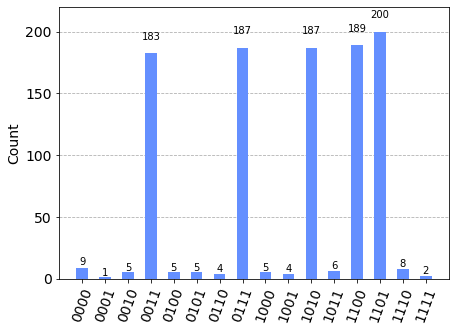

In [98]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(qc,simulator,shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

The resulting histogram represents  the measured  path descriptor of  the depth two after one rotation of Grover's amplification  of the  marked states  with one penny,